https://docs.google.com/document/d/1Y7C_4VdcUQ-_-L1MsTE5UnTnrH7GrRe_Hkw0tek6tr0/edit?fbclid=IwAR1NsPNpXauamfJ4GwGX5nD2GLPAbjF0sXfuZq8iE2cze6QPl14nsru8oJE

In [2]:
#
# Import all packages
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import datetime

#Import data preprocessing libraries
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Models used in the assignment
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import StandardScaler
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.metrics import silhouette_score
from apyori import apriori
from collections import defaultdict

import warnings
# To ignore any future warnings
warnings.filterwarnings("ignore")

class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 8 columns):
ID                  2980 non-null object
Name                2980 non-null object
Energy              2980 non-null float64
Loudness            2980 non-null float64
Speechiness         2980 non-null float64
Instrumentalness    2980 non-null float64
Type                2980 non-null object
time_signature      2980 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 186.3+ KB
None


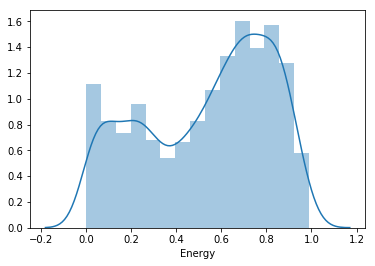

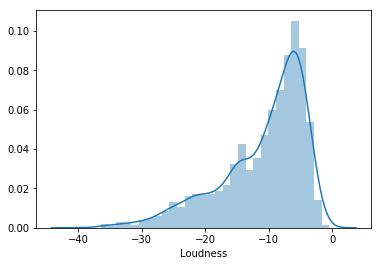

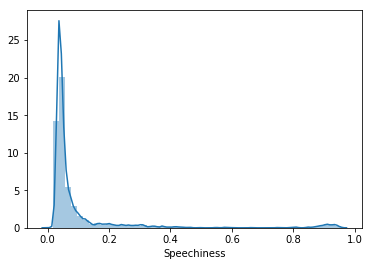

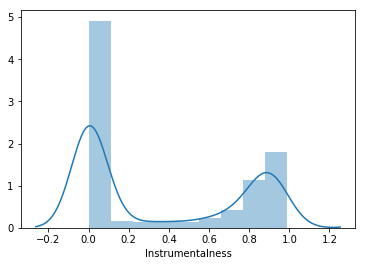

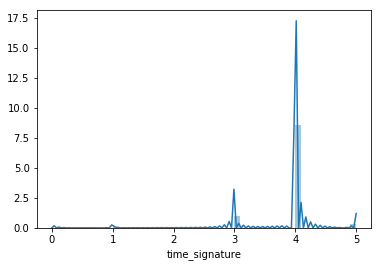

In [3]:

# read the dataset and set skipinitialspace to true to be able to .replace
df = pd.read_csv('./Spotify.csv', skipinitialspace=True, encoding='latin')
print(df.info())

# ID, Name, Type supplement variables

# Distribution of Energy
annsales_dist = sns.distplot(df['Energy'].dropna())
plt.show()

# Distribution of Loudness               
sales_dist = sns.distplot(df['Loudness'].dropna())
plt.show()

# Distribution of Speechiness         
sfloorsize_dist = sns.distplot(df['Speechiness'].dropna())
plt.show()

# Distribution of Instrumentalness    
totalInvestment_dist = sns.distplot(df['Instrumentalness'].dropna())
plt.show()

# Distribution of time_signature    
totalInvestment_dist = sns.distplot(df['time_signature'].dropna())
plt.show()

rs = 10

Task 1.1 Question 1
No missing values. Only one unique value for ‘Type’. No outliers



Task 1.1 Question 2
Energy, loudness, speechiness,  instrumentalness and time signature.The remaining variable (ID, Name and Type) have been dropped from the dataset as they are just supplementary values with no essential value. 


Task 1.2 Question 1


Task 1.2 Question 2
1a) Cluster membership
0    1928
2     942
1     110
Name: Cluster_ID, dtype: int64


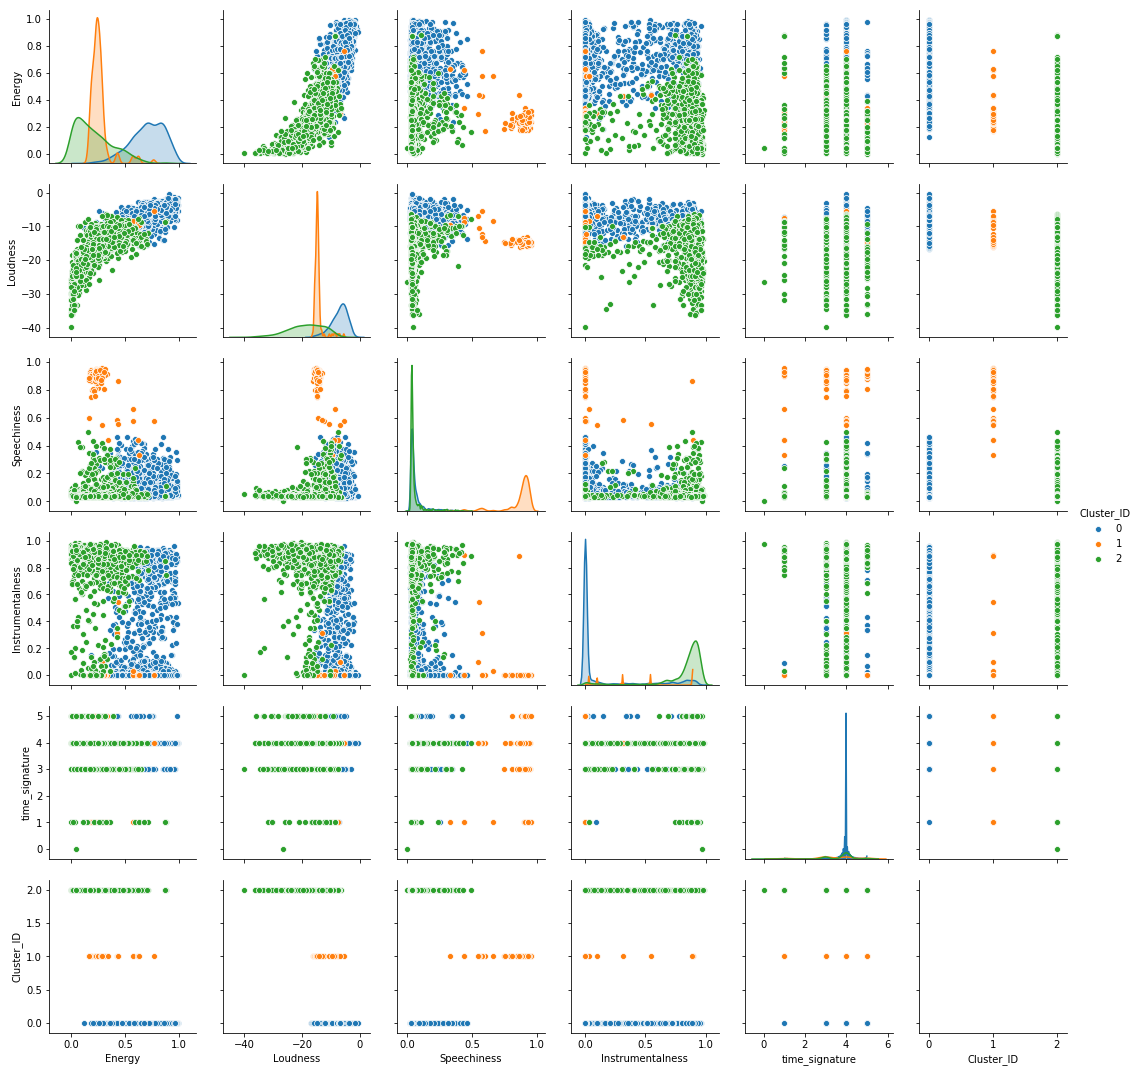



Task 1.2 Question 3
Distribution for cluster 0


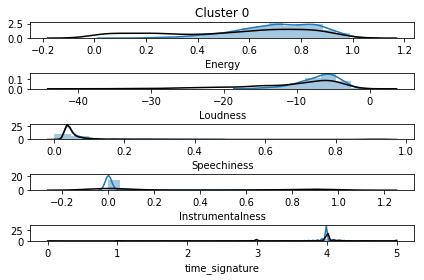

Distribution for cluster 1


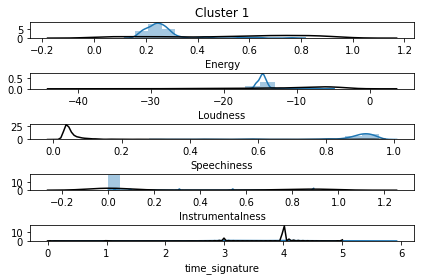

Distribution for cluster 2


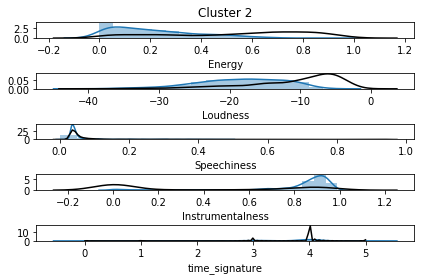

In [4]:
#          #
# Task 1.1 #
#          #
print(color.BOLD + "Task 1.1 Question 1" + color.END)
print("No missing values. Only one unique value for ‘Type’. No outliers\n")

print(color.BOLD + "\n\nTask 1.1 Question 2" + color.END)
print("Energy, loudness, speechiness,  instrumentalness and time signature.\
The remaining variable (ID, Name and Type) have been dropped from the dataset \
as they are just supplementary values with no essential value. ")

#          #
# Task 1.2 #
#          #
print(color.BOLD + "\n\nTask 1.2 Question 1" + color.END)
# take useful variables and drop the rest
df = df[['Energy', 'Loudness', 'Speechiness', 'Instrumentalness', 'time_signature']]

# convert df to matrix
X = df.as_matrix()

def modellingKMeans(X):
    # set the random state. different random state seeds might result in different centroids locations
    model = KMeans(n_clusters=3, random_state=rs)
    model.fit(X)

    # assign cluster ID to each record in X
    # Ignore the warning, does not apply to our case here
    y_defaultCluster = model.predict(X)
    df['Cluster_ID'] = y_defaultCluster

    # how many records are in each cluster 
    print("1a) Cluster membership")
    print(df['Cluster_ID'].value_counts())


    # pairplot the cluster distribution.
    cluster_g = sns.pairplot(df, hue='Cluster_ID')
    plt.show()
    return model, df

## Default model ##
#defModel, default_df = modellingKMeans(X)

print(color.BOLD + "\n\nTask 1.2 Question 2" + color.END)

## Scaled model ##
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaledModel, scaled_df = modellingKMeans(X_scaled)

print(color.BOLD + "\n\nTask 1.2 Question 3" + color.END)
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['Energy', 'Loudness', 'Speechiness', 'Instrumentalness', 'time_signature']
n_bins = 20

# inspecting cluster 0 and 1
clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df[col]), max(df[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df[df['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df[col], bins=bins, ax=ax[j], hist=False, color="k")


    plt.tight_layout(h_pad=0.05)
    plt.show()
    
# cluster 0 is rock-ish/ metal songs with high energy and very loud
# cluster 1 has low energy and slightly less loud, with high speechiness so it could be a bed time story podcast or audiobooks
# cluster 2 has low energy with lower than average loudness but almost 0 speechiness and high instrumentalness which indicates instrumental tracks

Task 1.3 Question 1
Using elbow method and silhouette, find the optimal K. What is the best K? Explain your reasoning


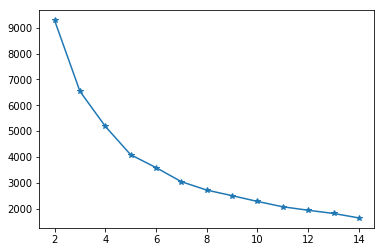

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=3 0.49735134989126045


 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=4 0.48690275088166723


 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=5 0.4549307028966717


In [5]:
#        #
# Task 1.3 #
#        #

print(color.BOLD + "Task 1.3 Question 1" + color.END)
print(color.BOLD + "Using elbow method and silhouette, find the optimal K. What is the best K? Explain your reasoning" + color.END)
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X_scaled)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
# plot the inertia vs K values
plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.show()

print(clusters[1])
print("Silhouette score for k=3", silhouette_score(X_scaled, clusters[1].predict(X_scaled)))

print("\n\n", clusters[2])
print("Silhouette score for k=4", silhouette_score(X_scaled, clusters[2].predict(X_scaled)))

print("\n\n", clusters[3])
print("Silhouette score for k=5", silhouette_score(X_scaled, clusters[3].predict(X_scaled)))


In [32]:
#        #
# Task 2 #
#        #

df = pd.read_csv('./POS_TRANSACTIONS.csv', skipinitialspace=True)


print(color.BOLD + "\nTask 2 Question 1" + color.END)
print(df.isnull().values.any())
print(df.info())
print(df.head(3))

print(color.BOLD + "\nTask 2 Question 2" + color.END)
# Location: Nominal
# Transaction_Id: Nominal used to group same transactions together 
# Transaction_Date: discrete variable?  no need to use this variable?
# Product_Name: Nominal used as input variable
# Quantity: supplement attribute as it is always set to 1 therefore not used

print(color.BOLD + "\nTask 2 Question 3" + color.END)

# group by account, then list all services  # apply is to convert each row into a list
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.0025))


def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)
# sort all acquired rules descending by lift
result_by_lift = result_df.sort_values(by='Lift', ascending=False)
result_by_confidence = result_df.sort_values(by='Confidence', ascending=False)

print(color.BOLD + "NOTE: min support is set to 0.01" + color.END)

print(color.BOLD + "Top 10 rules sorted by lift" + color.END)
print(result_by_lift.head(10))

print(color.BOLD + "\nTop 10 rules sorted by confidence"  + color.END)
print(result_by_confidence.head(10))




Task 2 Question 1
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459258 entries, 0 to 459257
Data columns (total 5 columns):
Location            459258 non-null int64
Transaction_Id      459258 non-null int64
Transaction_Date    459258 non-null object
Product_Name        459258 non-null object
Quantity            459258 non-null int64
dtypes: int64(3), object(2)
memory usage: 17.5+ MB
None
   Location  Transaction_Id Transaction_Date Product_Name  Quantity
0         2           12359       12/23/2018      Yoghurt         1
1         9           12362       12/23/2018          Jam         1
2         9           12362       12/23/2018          Jam         1

Task 2 Question 2

Task 2 Question 3
NOTE: min support is set to 0.01
Top 10 rules sorted by lift
             Left_side   Right_side   Support  Confidence      Lift
134  Bread,Conditioner       Butter  0.002735    0.603087  8.954523
66               Sugar       Cheese  0.006075    0.119141  8.213789
65              Cheese

             Left_side   Right_side   Support  Confidence      Lift
134  Bread,Conditioner       Butter  0.002735    0.603087  8.954523
66               Sugar       Cheese  0.006075    0.119141  8.213789
65              Cheese        Sugar  0.006075    0.418821  8.213789
137          Bread,Tea       Butter  0.003610    0.498963  7.408513
143         Tea,Butter         Milk  0.002975    0.225806  6.680664
144           Tea,Milk       Butter  0.002975    0.446027  6.622524
141    Tea,Conditioner       Butter  0.006490    0.377545  5.605718
140         Tea,Butter  Conditioner  0.006490    0.492600  5.475763
138         Tea,Butter        Bread  0.003610    0.274004  5.014252
40                Milk       Butter  0.008275    0.244822  3.635078


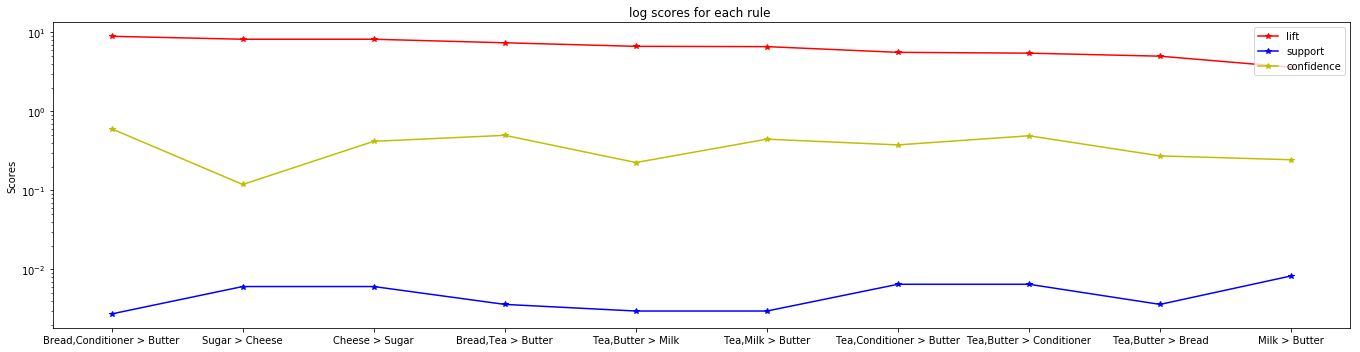

In [33]:
plotted_records = result_by_lift.head(10)
print(plotted_records)

ruleNumber = np.arange(0,10)

support_val = plotted_records['Support'].values.tolist()
#norm_supp = [float(i)/sum(support_val) for i in support_val]

confidence_val = plotted_records['Confidence'].values.tolist()
#norm_conf = [float(i)/sum(confidence_val) for i in confidence_val]

lift_val = plotted_records['Lift'].values.tolist()
#norm_lift = [float(i)/sum(lift_val) for i in lift_val]

# Create rules format to form X > Y
label1 = plotted_records['Left_side'].values.tolist()
label2 = plotted_records['Right_side'].values.tolist() 
combined_label = list(zip(label1, label2))
label = [" > ".join(labels) for labels in combined_label] 



x = np.arange(len(label))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(19,5))
line1 = plt.plot(ruleNumber, lift_val, 'r', label='lift', marker='*')
line2 = plt.plot(ruleNumber, support_val, 'b', label='support', marker='*')
line3 = plt.plot(ruleNumber, confidence_val, 'y', label='confidence', marker='*')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('log scores for each rule ')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_yscale('log')
ax.legend(loc='upper right')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



fig.tight_layout()

plt.show()

In [40]:
print(color.BOLD + "\nTask 2 Question 4" + color.END)
bread_df = result_df[result_df['Left_side'].str.contains('Bread')]
print(bread_df.info())

bread_by_lift = bread_df.sort_values(by='Lift', ascending=False)
bread_by_confidence = bread_df.sort_values(by='Confidence', ascending=False)

print(color.BOLD + "Top rules sorted by lift" + color.END)
display(bread_by_lift)
print(color.BOLD + "\nTop rules sorted by confidence"  + color.END)
display(bread_by_confidence)

print(color.BOLD + "\nTask 2 Question 5" + color.END)


Task 2 Question 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 17 to 137
Data columns (total 5 columns):
Left_side     11 non-null object
Right_side    11 non-null object
Support       11 non-null float64
Confidence    11 non-null float64
Lift          11 non-null float64
dtypes: float64(3), object(2)
memory usage: 528.0+ bytes
None
Top rules sorted by lift


,Left_side,Right_side,Support,Confidence,Lift
134,"Bread,Conditioner",Butter,0.002735,0.603087,8.954523
137,"Bread,Tea",Butter,0.003610,0.498963,7.408513
17,Bread,Butter,0.011340,0.207521,3.081236
133,"Bread,Butter",Conditioner,0.002735,0.241182,2.680988
21,Bread,Milk,0.002590,0.047397,1.402273
25,Bread,Sugar,0.003795,0.069448,1.361998
136,"Bread,Butter",Tea,0.003610,0.318342,1.319252
19,Bread,Conditioner,0.004535,0.082990,0.922523
27,Bread,Tea,0.007235,0.132400,0.548683
23,Bread,Shampoo,0.004065,0.074389,0.463701



Top rules sorted by confidence


,Left_side,Right_side,Support,Confidence,Lift
134,"Bread,Conditioner",Butter,0.002735,0.603087,8.954523
137,"Bread,Tea",Butter,0.003610,0.498963,7.408513
136,"Bread,Butter",Tea,0.003610,0.318342,1.319252
133,"Bread,Butter",Conditioner,0.002735,0.241182,2.680988
17,Bread,Butter,0.011340,0.207521,3.081236
27,Bread,Tea,0.007235,0.132400,0.548683
19,Bread,Conditioner,0.004535,0.082990,0.922523
23,Bread,Shampoo,0.004065,0.074389,0.463701
25,Bread,Sugar,0.003795,0.069448,1.361998
29,Bread,Yoghurt,0.002830,0.051789,0.302850



Task 2 Question 5


In [9]:
#        #
# Task 3 #
#        #

print(color.BOLD + "Task 3 Question 1" + color.END)
print(color.BOLD + "" + color.END)

print ("""Variable included is Description because the task is to determine clusters based on description.
Variables excluded are Cast names, Director, Rating, Release date, Runtime, Studio, Title, Writer, Year""")
# load the dataset

df = pd.read_csv('./Movie.csv', skipinitialspace=True) # encoding='latin'
#print(df.info())

# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

# Get stopwords with the default NLTK English stopwords
stopwords = set(sw.words('english')).union(set(['r','c','u']))

def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

print(color.BOLD + "\nTask 3 Question 2" + color.END)
print(color.BOLD + "" + color.END)

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # use count vectorizer to find TF and DF of each term UNFILTERED
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(df['Description'])
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(df['Description'])

# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
visualise_zipf(terms) #BEFORE FILTERING WORDS WITH TOPICAL STOPWORDS AND max/min df

print("""Based on the ZIPF plot:
From 5 most left and 5 most right are the top 10 least useful terms: 
(most-left)film, meet, mark, among, look glass
(most-right)hit sandra, driftwood world, afterward herbie, plumm owen, thing even.
This is because terms from most left appear too frequently in most documents and most right terms are too specific, thus they do not add value to clustering""")


print(color.BOLD + "\nTask 3 Question 3" + color.END)
print(color.BOLD + "" + color.END)
print("""Disregard 5 highest because it occurs in too many documents, thus do not add value to clustering. Also disregard 5 lowest because it occurs in too few documents, they are too specific to add value to clustering. Top terms in the cluster that do not make sense (such as topic stopwords) were also removed for T3Q6.""")


print(color.BOLD + "\nTask 3 Question 3" + color.END)
print(color.BOLD + "" + color.END)
print ("""T3 Q4: 
td-idf, where more count = term has higher weight but also takes into account the number of occurences in all "description"(document frequency) to offset the fact that some words just occur more frequently in general.""")




# Get stopwords with the default NLTK English stopwords AND UPDATED topic stopwards
stopwords = set(sw.words('english')).union(set(['r','c','u','film','take','find','one','get','new','life','first','find','world','man','become','year','best']))


# tf idf vectoriser WITH FILTER
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.7)
X = tfidf_vec.fit_transform(df['Description'])# + " " + df["Title"]) # derive genre from clusters

print(len(tfidf_vec.get_feature_names()))
print("There are 4485 input features")

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X) # (X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

sil_scores = []

for t in clusters:
    sil_scores.append(silhouette_score(X,t.predict(X)))

min_score = min(sil_scores)
max_score = max(sil_scores)

# index of lowest and highest score 
#print(sil_scores.index(min_score))
#print(sil_scores.index(max_score))

#print(sil_scores)
print("best silhoutte score: " + str(max_score) + " clusters: " + str(sil_scores.index(max_score) + 2))

# function to visualise text cluster. Useful for the assignment too :)
def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :5]:
            print(terms[term_idx], end=', ')
        print()
        
kmeans = KMeans(n_clusters=4, random_state=rs).fit(X) #X is filtered
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

print("""T3 Q6: Based on silhoutte scores, it is recommended to have 8 clusters. However, some clusters do not make sense until it was reduced to 4 clusters.

cluster 0 is 'Documentary', cluster 1 is 'Romance', cluster 2 is 'kids&family', cluster 3 is 'SciFi'. The 4 clusters correspond to the 4 given genres.""")


tf = sorted(terms, key = lambda i: i['tf'])[-15:]

stop_list = ['r','c','u','film','take','find','one','get','new','life','first','find','world','man','become','year','best']
#for t in tf:
#    if t['term'] in stop_list:
#        del t['term']
#        break
        
#tf_fil = sorted(tf, key = lambda i: i['tf'])[-10:]

print("Term frequency")
for t in tf:
    if str(t['term']) not in stop_list:
       print(str(t['term']) + ": "  +str(t['tf']))

print("""T3 Q7: Top 6 frequent terms - 

star: 168

time: 190

family: 197

story: 199

make: 199

love: 211""")

print("T3 Q8: It can be used to display genres for users to filter and search movies.")

Task 3 Question 1


Task 3 Question 2


Task 3 Question 3



In [3]:
#        #
# Task 4 #
#        #

print(color.BOLD + "Task 4 Question 1" + color.END)
print(color.BOLD + "" + color.END)

# load logs from wdata
wdata = open('weblog.csv', 'r').readlines()

# print the first 3 lines
print('\n'.join(wdata[:3]))

## Preprocessing ##

# set names of pandas dataframe
names=['IP', 'Timestamp', 'Request', 'Status']
# read the dataframe
df = pd.read_csv('weblog.csv', sep=',', names=names, header=None)
df.drop(0, inplace=True)  # drop the row with index 0, on axis 0 (row-wise)
def extract_method_and_protocol(row):
    # function to extract HTTP request method and protocol from a request string
    request_splits = row['Request'].split()  # split request string by space
    row['Method'] = request_splits[0]
    row['Protocol'] = request_splits[-1]
    row['Request'] = ' '.join(request_splits[1:-1])  # stitch remaining request string back
    return row

df = df.apply(extract_method_and_protocol, axis=1)

IP address,Timestamp,Request,Staus

10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200

10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302



In [21]:
#Drop the protocol column
df = df.drop(['Protocol'], axis=1)

mask = (df['Request'].str.endswith('.gif') | df['Request'].str.endswith('.jpg') | \
        df['Request'].str.endswith('.jpeg') | df['Request'].str.endswith('.png') | df['Request'].str.endswith('.css') \
        | df['Request'].str.endswith('.js'))

print("# Rows before:", len(df))
#Remove all unsuccessful requests
df['Status'] = df['Status'].astype(int)
df['Datetime'] = pd.to_datetime(df['Timestamp'], format='[%d/%b/%Y:%H:%M:%S')  # set date time to pandas datatime obj
df = df.drop(['Timestamp'], axis=1)

df = df[df['Status'] == 200]
print("After unsuccessful requests", len(df))
# invert the mask, only keep records without .gif, .jpg, .png and .jpeg in the request column
df2 = df[~mask]
print("After images removal", len(df2))
df2 = df2[df2['Status'] == 200]
print("After unsuccessful requests removal", len(df2))

# show the result
print(df2.head())

#Make a copy just in case
df3 = df2.copy()
#Sort based upon the time
df3.sort_values(by='Datetime', inplace = True)
#initiate session ID and User ID to 0
session_id = 0
user_id = 0

# create a dictionaries to hold last access information
last_access = defaultdict(lambda:datetime.datetime.utcfromtimestamp(0))

# dictionary to find previous session, user ID and steps assigned to a specific date/ip/browser key
session_dict = defaultdict(lambda:1)
user_id_dict = defaultdict(lambda:1)
session_steps = defaultdict(lambda:1)

# function to be applied row wise
# for each row, produce session, user ID and path traversal
def get_log_user_info(row):
    # access global variables shared between all rows
    global session_id, user_id, session_dict, user_id_dict, session_steps, last_access
    
    session_key = str(row['Datetime'].date()) + '_' + row['IP']  # date + IP key for finding session
    user_key = str(row['Datetime'].date()) + '_' + row['IP'] # date + IP + browser key for finding user
    time_diff_session = row['Datetime'] - last_access[session_key]  # session time diff
    time_diff_user = row['Datetime'] - last_access[user_key]  # user time diff
    
    # if the time diff from previous session is > 30 mins, assign new session ID
    if time_diff_session.total_seconds() > 1800:
        session_id += 1
        session_dict[session_key] = session_id
    
    # if the time diff from previous session is > 60 mins, assign new user ID
    if time_diff_user.total_seconds() > 3600:
        user_id += 1
        user_id_dict[user_key] = user_id
        
    # update last access for session and user
    last_access[session_key] = row['Datetime']
    last_access[user_key] = row['Datetime']

    # assign extracted info from the row
    row['Session'] = session_dict[session_key]
    row['Step'] = session_steps[row['Session']]
    row['User_ID'] = user_id_dict[user_key]
    session_steps[row['Session']] += 1
    return row
# apply function above to get a new dataframe with added information
df3 = df3.apply(get_log_user_info, axis=1)

display(df3)

# Rows before: 11330
After unsuccessful requests 11330
After images removal 7122
After unsuccessful requests removal 7122
            IP                 Request  Status Method  Protocol  \
1   10.128.2.1              /login.php     200    GET  HTTP/1.1   
3   10.128.2.1               /home.php     200    GET  HTTP/1.1   
6   10.130.2.1  /profile.php?user=bala     200    GET  HTTP/1.1   
9   10.131.2.1     /edit.php?name=bala     200    GET  HTTP/1.1   
11  10.131.2.1              /login.php     200    GET  HTTP/1.1   

              Datetime  
1  2017-11-29 06:58:55  
3  2017-11-29 06:59:03  
6  2017-11-29 06:59:19  
9  2017-11-29 06:59:30  
11 2017-11-29 06:59:37  


,IP,Request,Status,Method,Protocol,Datetime,Session,Step,User_ID
4313,10.130.2.1,/,200,GET,HTTP/1.1,2017-11-07 23:59:19,1,2,1
5431,10.130.2.1,/,200,GET,HTTP/1.1,2017-11-07 23:59:19,1,3,1
5433,10.129.2.1,/login.php,200,GET,HTTP/1.1,2017-11-08 00:39:07,2,1,2
4315,10.129.2.1,/login.php,200,GET,HTTP/1.1,2017-11-08 00:39:07,2,2,2
5435,10.129.2.1,/login.php,200,GET,HTTP/1.1,2017-11-08 01:36:22,3,1,2
4317,10.129.2.1,/login.php,200,GET,HTTP/1.1,2017-11-08 01:36:22,3,2,2
5437,10.131.0.1,/login.php,200,GET,HTTP/1.1,2017-11-08 03:12:46,4,1,3
4319,10.131.0.1,/login.php,200,GET,HTTP/1.1,2017-11-08 03:12:46,4,2,3
5439,10.130.2.1,/login.php,200,GET,HTTP/1.1,2017-11-08 05:01:24,5,1,4
4321,10.130.2.1,/login.php,200,GET,HTTP/1.1,2017-11-08 05:01:24,5,2,4


In [27]:
# group by User_ID, then list all Requests
transactions = df3.groupby(['User_ID'])['Request'].apply(list)

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.08))
    
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(6))
print(len(result_df))


print(color.BOLD + "\nTask 4 Question 2" + color.END)
print(color.BOLD + "" + color.END)

print(color.BOLD + "\nTask 4 Question 3" + color.END)
print(color.BOLD + "" + color.END)

                                   Left_side  \
10                                 /home.php   
9                               /archive.php   
17                                /login.php   
18                                 /sign.php   
13  /fonts/fontawesome-webfont.woff2?v=4.6.3   
14                                /login.php   

                                  Right_side   Support  Confidence      Lift  
10                              /archive.php  0.101626    0.423729  2.817224  
9                                  /home.php  0.101626    0.675676  2.817224  
17                                 /sign.php  0.097561    0.120200  1.043622  
18                                /login.php  0.097561    0.847059  1.043622  
13                                /login.php  0.169377    0.838926  1.033602  
14  /fonts/fontawesome-webfont.woff2?v=4.6.3  0.169377    0.208681  1.033602  
19

Task 4 Question 2


Task 4 Question 3

